In [146]:
import os

mingw_path = 'C:\\Program Files\\mingw-w64\\x86_64-6.3.0-posix-seh-rt_v5-rev1\\mingw64\\bin';os.environ['PATH'] = mingw_path + ';' + os.environ['PATH']

os.environ['PATH'] = mingw_path + ';' + os.environ['PATH']


import numpy as np # linear algebra
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

color = sns.color_palette()

%matplotlib inline

pd.options.mode.chained_assignment = None  # default='warn'
import pylab
import calendar
from scipy import stats
from datetime import datetime

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import  preprocessing, ensemble
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from xgboost import XGBClassifier
from sklearn.cross_validation import train_test_split
from sklearn.metrics import log_loss
import xgboost as xgb
from sklearn.model_selection import learning_curve
from imblearn.over_sampling import SMOTE


In [204]:
train_df1 = pd.read_json("E:/GA_TECH_DataMining/project/train.json")
#encoder = LabelBinarizer()
#train_y = encoder.fit_transform(y)
#train_y = transformed_y.transform(y)


In [208]:
target_num_map = {'high':0, 'medium':1, 'low':2}
train_y2 = np.array(train_df1['interest_level'].apply(lambda x: target_num_map[x]))
#X.head()
#y.head()
train_y2
tdf = train_df1['interest_level'].apply(lambda x: target_num_map[x])
tdf.head

<bound method Series.head of 10        1
10000     2
100004    0
100007    2
100013    2
100014    1
100016    2
100020    2
100026    1
100027    2
100030    2
10004     2
100044    0
100048    2
10005     2
100051    1
100052    2
100053    2
100055    2
100058    2
100062    2
100063    1
100065    2
100066    2
10007     1
100071    2
100075    1
100076    2
100079    0
100081    2
         ..
99915     2
99917     2
99919     1
99921     1
99923     2
99924     2
99931     2
99933     2
99935     2
99937     2
9994      2
99953     2
99956     2
99960     1
99961     2
99964     1
99965     2
99966     2
99979     2
99980     2
99982     0
99984     2
99986     2
99987     2
99988     1
9999      1
99991     2
99992     2
99993     2
99994     2
Name: interest_level, dtype: int64>

In [149]:
#train_df = pd.read_json("E:/GA_TECH_DataMining/project/train.json")
#type(train_df)
train_df1 = pd.read_csv("E:/GA_TECH_DataMining/project/Final_Project_Variables - combined.csv")

#train_df = train_df1[train_df1.interest_code.notnull()]
#train_df.head()
#train_df.features.head(10)
#df = train_df.features.to_frame
#type(df)
#train_df.features.index

(124011, 825)

In [151]:
train_df1.shape
#train_df.shape

(124011, 825)

In [178]:
test_df = train_df1[train_df1.interest_code.isnull()]
train_df = train_df1[train_df1.interest_code.notnull()]



In [179]:
train_df.shape
test_df.shape

(74659, 825)

In [163]:
train_df1.interest_code.value_counts(dropna=False)

NaN     74659
 1.0    34284
 2.0    11229
 3.0     3839
Name: interest_code, dtype: int64

In [166]:
train_df2 = pd.read_csv("E:/GA_TECH_DataMining/project/Final_Project_Variables - train.csv")

In [168]:
train_df2.shape

(49352, 825)

In [165]:
train_df3 = pd.read_csv("E:/GA_TECH_DataMining/project/Final_Project_Variables - test.csv")

In [169]:
train_df3.shape

(74659, 825)

In [118]:
train_df['interest_code']

4         2.0
6         1.0
9         2.0
10        2.0
15        1.0
16        1.0
18        1.0
19        3.0
23        1.0
32        1.0
33        1.0
36        1.0
38        2.0
39        1.0
42        1.0
43        1.0
44        1.0
46        3.0
49        1.0
61        1.0
66        1.0
67        1.0
69        1.0
74        1.0
78        2.0
80        1.0
82        1.0
83        1.0
84        1.0
85        1.0
         ... 
123951    1.0
123953    1.0
123958    1.0
123961    1.0
123963    2.0
123964    1.0
123965    1.0
123966    1.0
123970    2.0
123972    2.0
123975    1.0
123976    1.0
123977    1.0
123979    1.0
123980    1.0
123982    1.0
123984    1.0
123985    1.0
123986    1.0
123987    3.0
123991    2.0
123992    1.0
123995    2.0
123996    1.0
123998    1.0
124000    1.0
124002    2.0
124004    2.0
124008    2.0
124009    3.0
Name: interest_code, dtype: float64

In [3]:
test_df = pd.read_json("E:/GA_TECH_DataMining/project/test.json")
print("Train Rows : ", train_df.shape[0])
print("Test Rows : ", test_df.shape[0])




('Train Rows : ', 49352)
('Test Rows : ', 74659)


In [9]:
train_df.shape

(49352, 15)

In [10]:
test_df.shape

(74659, 14)

In [11]:
#info method provides information about dataset like 
#total values in each column, null/not null, datatype, memory occupied etc
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 49352 entries, 10.0 to 99994.0
Data columns (total 15 columns):
bathrooms          49352 non-null float64
bedrooms           49352 non-null int64
building_id        49352 non-null object
created            49352 non-null object
description        49352 non-null object
display_address    49352 non-null object
features           49352 non-null object
interest_level     49352 non-null object
latitude           49352 non-null float64
listing_id         49352 non-null int64
longitude          49352 non-null float64
manager_id         49352 non-null object
photos             49352 non-null object
price              49352 non-null int64
street_address     49352 non-null object
dtypes: float64(3), int64(3), object(9)
memory usage: 6.0+ MB


In [12]:
#How many columns with different datatypes are there?
train_df.get_dtype_counts()

float64    3
int64      3
object     9
dtype: int64

In [7]:
##Describe gives statistical information about numerical columns in the dataset
train_df.describe()

,bathrooms,bedrooms,latitude,listing_id,longitude,price
count,49352.00000,49352.000000,49352.000000,49352.000000,49352.000000,49352.000000
mean,1.21218,1.541640,40.741545,7024054.655394,-73.955716,3830.174036
std,0.50142,1.115018,0.638535,126274.611244,1.177912,22066.865885
min,0.00000,0.000000,0.000000,6811957.000000,-118.271000,43.000000
25%,1.00000,1.000000,40.728300,6915887.500000,-73.991700,2500.000000
50%,1.00000,1.000000,40.751800,7021070.500000,-73.977900,3150.000000
75%,1.00000,2.000000,40.774300,7128733.250000,-73.954800,4100.000000
max,10.00000,8.000000,44.883500,7753784.000000,0.000000,4490000.000000


In [16]:
train_df.features.head(8)

10                                                       []
10000     [Doorman, Elevator, Fitness Center, Cats Allow...
100004    [Laundry In Building, Dishwasher, Hardwood Flo...
100007                            [Hardwood Floors, No Fee]
100013                                            [Pre-War]
100014                                                   []
100016    [prewar, elevator, Dogs Allowed, Cats Allowed,...
100020    [Doorman, Elevator, Pre-War, Terrace, Laundry ...
Name: features, dtype: object

**Target Variable**

Before delving more into the features, let us first have a look at the target variable 'interest level'

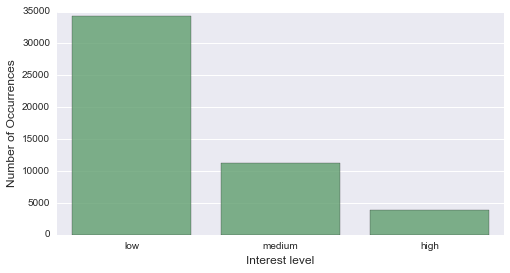

In [6]:
int_level = train_df['interest_level'].value_counts()

plt.figure(figsize=(8,4))
sns.barplot(int_level.index, int_level.values, alpha=0.8, color=color[1])
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Interest level', fontsize=12)
plt.show()

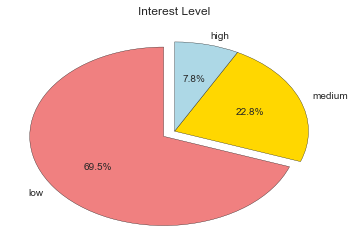

In [8]:
#target variable
labels = ["low","medium","high"]
sizes = train_df.interest_level.value_counts().values
explode=[0.1,0,0]
colors = ['lightcoral','gold','lightblue']
patches, texts,autotexts= plt.pie(sizes, labels=labels,colors=colors,explode=explode,autopct="%1.1f%%",
                        startangle=90)
plt.title("Interest Level")
plt.show()

Interest level is low for most of the cases followed by medium.

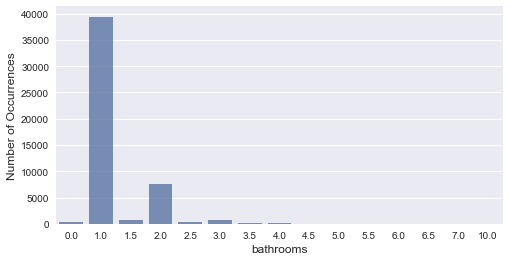

In [10]:
cnt_srs = train_df['bathrooms'].value_counts()

plt.figure(figsize=(8,4))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8, color=color[0])
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('bathrooms', fontsize=12)
plt.show()


In [13]:
cnt_srs

1.0     39422
2.0      7660
3.0       745
1.5       645
0.0       313
2.5       277
4.0       159
3.5        70
4.5        29
5.0        20
5.5         5
6.0         4
6.5         1
10.0        1
7.0         1
Name: bathrooms, dtype: int64

In [30]:
train_df.groupby('interest_level').bathrooms.value_counts()

interest_level  bathrooms
high            1.0           3413
                2.0            407
                3.0             18
                0.0              1
low             1.0          26581
                2.0           5566
                3.0            952
                1.5            605
                0.0            306
                2.5            274
medium          1.0           9428
                2.0           1687
                3.0             65
                1.5             40
                0.0              6
                2.5              3
dtype: int64

In [42]:
from sklearn.metrics import accuracy_score, log_loss

In [183]:
#train_df["created"] = pd.to_datetime(train_df["created"])
#train_df = train_df[train_df["latitude"] != 0]
#train_df = train_df[train_df["longitude"] != 0]
features = ["log_price_adj","bathrooms_z", "bedrooms_z", "latitude_z", "longitude_z", "cluster","interest_adj"]
train_df.columns
train_df.head()


,observation,listing_id,interest_code,days_between_adj_5,log_price_adj_3,interest_adj_13,feature_count_adj_25,bathrooms_adj_4,descript_len_adj_11,bedrooms_adj_3,...,bathrooms_adj_21,bathrooms_adj_22,bathrooms_adj_23,bathrooms_adj_24,bathrooms_adj_25,bathrooms_adj_26,bathrooms_adj_27,bathrooms_adj_28,bathrooms_adj_29,bathrooms_adj_30
4,4,7170325,2.0,1318,23.485804,19,130,4.0,5398,4,...,21.0,22.0,23.0,24.0,25.0,26.0,27.0,28.0,29.0,30.0
6,6,7092344,1.0,1173,24.941265,18,168,6.0,7174,7,...,23.0,24.0,26.0,27.0,28.0,29.0,30.0,31.0,33.0,34.0
9,9,7158677,2.0,1170,24.302001,21,127,4.0,6583,5,...,25.0,26.0,27.0,28.0,31.0,34.0,35.0,36.0,37.0,38.0
10,10,7211212,2.0,1189,23.654460,15,46,4.5,5388,5,...,23.0,24.0,25.0,26.0,27.0,28.0,29.0,30.0,31.0,32.0
15,15,7225292,1.0,1207,25.326354,17,195,6.0,6230,5,...,24.0,25.0,26.0,27.0,28.0,29.0,30.0,31.0,32.0,33.0


In [190]:
X = train_df.iloc[:,3:50]
train_y = train_df["interest_code"]
from sklearn.preprocessing import LabelBinarizer
X.head()
#encoder = LabelBinarizer()
#train_y = encoder.fit_transform(y)
#train_y = transformed_y.transform(y)
#target_num_map = {'high':0, 'medium':1, 'low':2}
#train_y = np.array(train_df['interest_level'].apply(lambda x: target_num_map[x]))
#X.head()
#y.head()
#train_y

,days_between_adj_5,log_price_adj_3,interest_adj_13,feature_count_adj_25,bathrooms_adj_4,descript_len_adj_11,bedrooms_adj_3,mgmt_list_count,feature_count,descript_len,...,Gym,Parking,Storage,Sunlight,Pool,Laundry_Room,Wash_Dry,Dishwasher,Prewar,AirCon
4,1318,23.485804,19,130,4.0,5398,4,294,7,530,...,0,0,0,0,0,1,0,1,1,0
6,1173,24.941265,18,168,6.0,7174,7,64,6,804,...,0,0,0,0,0,1,0,1,0,0
9,1170,24.302001,21,127,4.0,6583,5,265,6,776,...,0,0,0,0,0,1,1,1,0,0
10,1189,23.654460,15,46,4.5,5388,5,235,0,565,...,0,0,0,0,0,0,0,0,0,0
15,1207,25.326354,17,195,6.0,6230,5,135,4,321,...,1,0,0,0,0,1,0,0,0,0


In [130]:
#X = train_df['log_price_z',]
#y = train_df['interest_adj']
#train_df.columns

Index([u'observation', u'listing_id', u'log_price_adj', u'interest_adj',
       u'bedrooms_z', u'bathrooms_z', u'latitude_z', u'longitude_z',
       u'log_price_z', u'log_price', u'one', u'two', u'three', u'four',
       u'five', u'six', u'seven', u'cluster', u'interest_code'],
      dtype='object')

In [13]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1)

In [23]:
y_val.head()

34539        low
124002    medium
106651       low
48666        low
43446       high
Name: interest_level, dtype: object

In [45]:
clf = RandomForestClassifier(n_estimators=2000)
clf.fit(X_train, y_train)
y_val_pred = clf.predict_proba(X_val)

log_loss(y_val, y_val_pred)

0.89951464411527948

In [218]:
target_num_map = {1:0, 2:1, 3:2}
train_y = np.array(train_df['interest_code'].apply(lambda x: target_num_map[x]))
train_y.max()

2

In [191]:

#learning_rate = [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3]
#n_estimators = [100, 200]
#learning_rate =0.1
#max_depth=5
#min_child_weight=1, 
#gamma=0, 
#subsample=0.8, 
#colsample_bytree=0.8,
#objective= 'binary:logistic', 
#nthread=4, 
#scale_pos_weight=1, 
#seed=27)
param_grid = {'learning_rate': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3],
              #'n_estimators' : [100, 200]
             }

param_fixed = { 'objective' : 'multi:softprob'
              }


In [192]:
model = XGBClassifier(objective='multi:softprob',seed=27)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
grid_search = GridSearchCV(model, param_grid, n_jobs=-1, scoring="neg_log_loss", cv=kfold)
grid_result = grid_search.fit(X, train_y)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))
    
grid_result.return_train_score
# plot
#plt.errorbar(learning_rate, means, yerr=stds)
#plt.title("XGBoost learning_rate vs Log Loss")
#plt.xlabel('learning_rate')
#plt.ylabel('Log Loss')

Best: -0.608347 using {'learning_rate': 0.3}
-1.093041 (0.000036) with: {'learning_rate': 0.0001}
-1.046866 (0.000313) with: {'learning_rate': 0.001}
-0.804366 (0.001897) with: {'learning_rate': 0.01}
-0.633511 (0.005263) with: {'learning_rate': 0.1}
-0.615783 (0.005357) with: {'learning_rate': 0.2}
-0.608347 (0.005186) with: {'learning_rate': 0.3}


True

In [85]:
#grid_result.cv_results_

In [108]:
preds = grid_result.predict_proba(X)

preds = pd.DataFrame(preds)
cols = ['high', 'medium', 'low']

preds.columns = cols
#preds['listing_id'] = listing_id

preds.to_csv('E:/rentalProject/my_preds.csv', index=None)

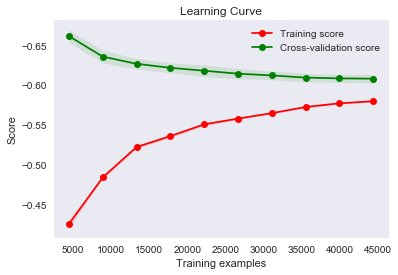

In [193]:
estimator = XGBClassifier(objective='multi:softprob',learning_rate= 0.3,seed=27 )
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
train_sizes, train_scores, test_scores = learning_curve(
    estimator, X, train_y, cv=cv, scoring="neg_log_loss", n_jobs=-1, train_sizes=np.linspace(.1,1., 10))
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
plt.figure()
plt.title("Learning Curve")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.gca().invert_yaxis()
plt.grid()

plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1,
                 color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
         label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
         label="Cross-validation score")

plt.legend(loc="best")
plt.show()

In [215]:
train_y.max()
train_y1 = np.array(train_y,dtype=int)
train_y1

array([2, 1, 2, ..., 2, 2, 3])

In [219]:
dtrain = xgb.DMatrix(data=X, label=train_y)
#params = {'max_depth':5, 'eta':0.3,  'objective':'multi:softprob', 'eval_metric':'mlogloss','num_class':3}
params = { 'objective':'multi:softprob', 'eval_metric':'mlogloss','num_class':3}
num_round = 100
print ('running cross validation')
# do cross validation, this will print result out as
# [iteration]  metric_name:mean_value+std_value
# std_value is standard deviation of the metric
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
xcv =xgb.cv(params,dtrain, num_boost_round=150,seed = 0,folds=kfold)
xcv

#xgb.train(params,dtrain)
#dtrain.feature_names

running cross validation


,test-mlogloss-mean,test-mlogloss-std,train-mlogloss-mean,train-mlogloss-std
0,0.935754,0.000605,0.931897,0.001279
1,0.840141,0.000920,0.832932,0.001539
2,0.779100,0.001722,0.768498,0.001651
3,0.738272,0.002255,0.724827,0.001468
4,0.710676,0.002207,0.694168,0.001731
5,0.690897,0.002111,0.671597,0.002334
6,0.675992,0.002938,0.653761,0.001911
7,0.664445,0.003110,0.639386,0.001810
8,0.655648,0.002902,0.627915,0.002263
9,0.648595,0.002426,0.618039,0.002177


In [220]:
xgb.plot_importance(xcv)
pyplot.show()

ValueError: tree must be Booster, XGBModel or dict instance

In [96]:
#xcv['train-mlogloss-mean']
sm = SMOTE(kind='regular')
X_resampled, y_resampled = sm.fit_sample(X, y)

NameError: name 'kfolds' is not defined

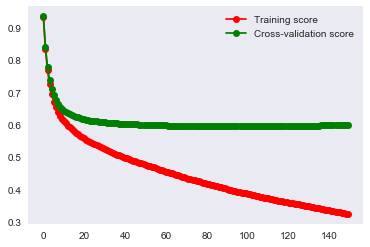

In [221]:
#plt.gca().invert_yaxis()
plt.grid()

#plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
 #                train_scores_mean + train_scores_std, alpha=0.1,
  #               color="r")
#plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 #test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(xcv.index, xcv['train-mlogloss-mean'], 'o-', color="r",
         label="Training score")
plt.plot(xcv.index, xcv['test-mlogloss-mean'], 'o-', color="g",
         label="Cross-validation score")

plt.legend(loc="best")
plt.show()

In [43]:
xcv.shape[0]

100

In [19]:
y_val_pred.shape

(4934L, 3L)

In [65]:
clf = BaggingClassifier(KNeighborsClassifier(), max_samples=0.5, max_features=0.5)
clf.fit(X_train, y_train)
y_val_pred = clf.predict_proba(X_val)
log_loss(y_val, y_val_pred)

0.80789907097742264

In [20]:
clf = AdaBoostClassifier(n_estimators=2000)
clf.fit(X_train, y_train)
y_val_pred = clf.predict_proba(X_val)
log_loss(y_val, y_val_pred)

1.0978403368671374

In [21]:
clf = GradientBoostingClassifier(n_estimators=2000, learning_rate=1.0,
    max_depth=1, random_state=0).fit(X_train, y_train)
y_val_pred = clf.predict_proba(X_val)
log_loss(y_val, y_val_pred)

0.68926639444576865

In [ ]:
#learning_rate = [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3]
#param_grid = dict(learning_rate=learning_rate)
#kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
#grid_search = GridSearchCV(model, param_grid, scoring="neg_log_loss", n_jobs=-1, cv=kfold)
#grid_result = grid_search.fit(X, label_encoded_y)

In [96]:
submission = pd.DataFrame({
        "listing_id": X_val.index,
        "high": y_val_pred[:,0],
        "medium":y_val_pred[:,2],
        "low":y_val_pred[:,1]
    })
    
columnsTitles=["listing_id","high","medium","low"]
submission=submission.reindex(columns=columnsTitles)
submission.to_csv('submission.csv', index=False)

In [95]:
import sklearn

print('The scikit-learn version is {}.'.format(sklearn.__version__))


The scikit-learn version is 0.18.1.
